# Imports

In [2]:
from scipy.io import loadmat
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Understanding and Visualising the Dataset

In [3]:
data_dict = loadmat('CYLINDER_ALL.mat')

In [4]:
data_dict.keys()

dict_keys(['__header__', '__version__', '__globals__', 'UALL', 'UEXTRA', 'VALL', 'VEXTRA', 'VORTALL', 'VORTEXTRA', 'm', 'n', 'nx', 'ny'])

1. The dataset contains 151 time snapshots - which is the number of columns
2. each column has 199 × 449 elements - where 199 corresponds to number of rows and 449 correspond to number of columns in the 2D representation of the flow fields

In [5]:
X_vel = data_dict['UALL']
Y_vel = data_dict['VALL'] 

<class 'numpy.ndarray'>
Shape of X_vel:  (89351, 151)
[1.01243  1.01186  1.01119  ... 0.893477 0.896224 0.898832]
Reshaped x velocity at the 0th snapshot: [[1.01243  1.01186  1.01119  ... 1.01816  1.01862  1.019   ]
 [1.01394  1.01323  1.01255  ... 1.01956  1.02001  1.02046 ]
 [1.01516  1.01458  1.01393  ... 1.02097  1.02139  1.02175 ]
 ...
 [1.01202  1.01168  1.01129  ... 0.888106 0.891065 0.894012]
 [1.00918  1.00873  1.00829  ... 0.890758 0.893679 0.896936]
 [1.00618  1.00579  1.00532  ... 0.893477 0.896224 0.898832]]


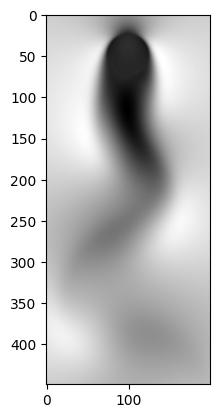

In [6]:
print(type(X_vel))

print("Shape of X_vel: ", X_vel.shape)

print(X_vel[:, 0])

print("Reshaped x velocity at the 0th snapshot:",X_vel[:, 0].reshape((449, 199)))

plt.imshow(X_vel[:, 0].reshape((449, 199)), cmap='gray')

<class 'numpy.ndarray'>
Shape of Y_vel:  (89351, 151)
[-0.11537  -0.116503 -0.118006 ...  0.155858  0.153764  0.150355]
Reshaped y velocity at the 0th snapshot: [[-0.11537  -0.116503 -0.118006 ...  0.109766  0.108284  0.107065]
 [-0.11591  -0.117236 -0.118632 ...  0.110183  0.108769  0.107414]
 [-0.116522 -0.1179   -0.119302 ...  0.110618  0.109196  0.107802]
 ...
 [ 0.156411  0.159358  0.162354 ...  0.151325  0.148807  0.146373]
 [ 0.156039  0.158946  0.161933 ...  0.153732  0.151209  0.148572]
 [ 0.155694  0.158454  0.161515 ...  0.155858  0.153764  0.150355]]


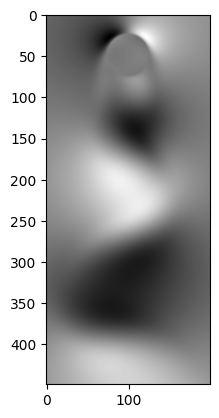

In [7]:
print(type(Y_vel))

print("Shape of Y_vel: ", Y_vel.shape)

print(Y_vel[:, 0])

print("Reshaped y velocity at the 0th snapshot:",Y_vel[:, 0].reshape((449, 199)))

plt.imshow(Y_vel[:, 0].reshape((449, 199)), cmap='gray')

In [8]:
def create_and_save_animation(frames_data, output_animation_gif_name: str, num_frames=50):
    fig = plt.figure() 
    axis = plt.axes(xlim =(0, 198), 
                    ylim =(0, 448)) 
    img, = axis.plot([], []) 

    def animate(i): 
        img = plt.imshow(frames_data[:, i].reshape((449, 199)), cmap='gray') 
        return img, 

    anim = FuncAnimation(fig, animate, 
                        frames = num_frames, interval = 20, blit = True) 

    anim.save(f'Animations/{output_animation_gif_name}.gif',
            writer = 'ffmeg', fps = 30)
    
    return anim

In [92]:
# create_and_save_animation(X_vel, 'velocity_along_x', num_frames=150)
# create_and_save_animation(Y_vel, 'velocity_along_y', num_frames=150)

# Computing SVD

## SVD of X_vel

In [9]:
Uh_X, Sh_X, VT_X = np.linalg.svd(X_vel, full_matrices=False)

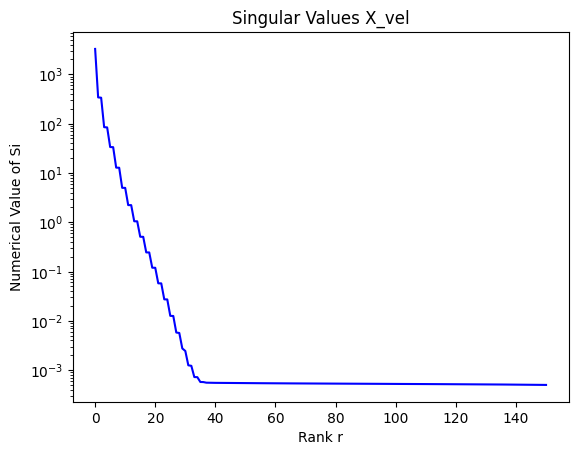

In [10]:
plt.gca().set_yscale('log')
plt.plot(Sh_X, color='blue') 
plt.title('Singular Values X_vel')
plt.xlabel('Rank r')
plt.ylabel('Numerical Value of Si')
plt.savefig('Plots/Singular Values X_vel.png')
plt.show()

In [95]:
# create_and_save_animation(Uh_X, 'eigen_flow_field_along_x', 3)

## SVD of Y_vel

In [11]:
Uh_Y, Sh_Y, VT_Y = np.linalg.svd(Y_vel, full_matrices=False)

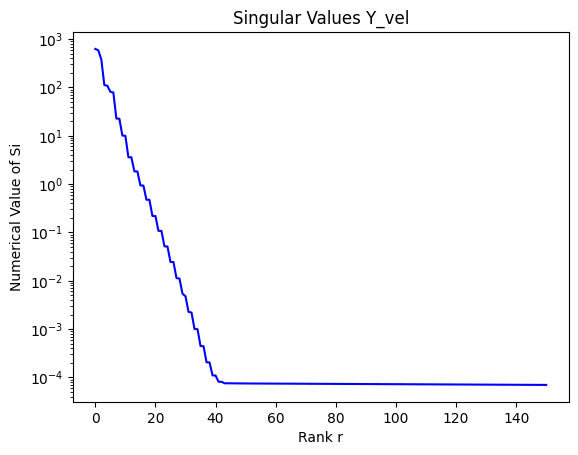

In [12]:
plt.gca().set_yscale('log')
plt.plot(Sh_Y, color='blue') 
plt.title('Singular Values Y_vel')
plt.xlabel('Rank r')
plt.ylabel('Numerical Value of Si')
plt.savefig('Plots/Singular Values Y_vel.png')
plt.show()

In [98]:
# create_and_save_animation(Uh_Y, 'eigen_flow_field_along_y', 3)

# Energy

## Energy X_vel

In [13]:
cum_energy_X = np.cumsum(np.square(Sh_X))

In [14]:
percentage_of_energy_X = cum_energy_X/cum_energy_X[-1]

99.91% energy -> r = 4 
99.84% energy -> r = 3 
97.76% energy -> r = 1

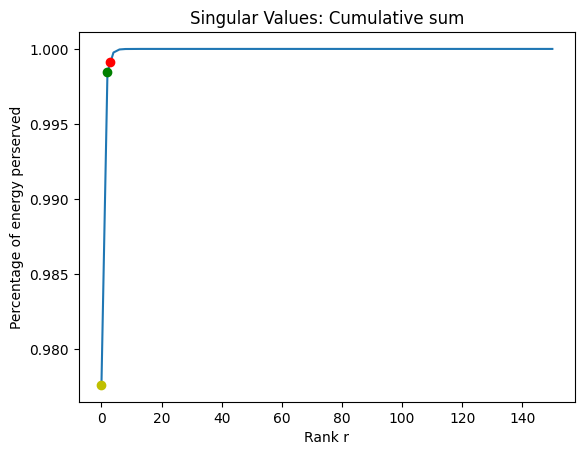

In [16]:
plt.figure(2)
plt.plot(percentage_of_energy_X)
plt.plot(0,percentage_of_energy_X[0],"yo")
plt.plot(2,percentage_of_energy_X[2],"go")
plt.plot(3,percentage_of_energy_X[3],"ro")
plt.title('Singular Values: Cumulative sum')
plt.xlabel('Rank r')
plt.ylabel('Percentage of energy perserved')
plt.show()

In [17]:
Sh_X_diag = np.diag(Sh_X)

In [19]:
for r in(1,3,4):
    Xapprox = Uh_X[:,:r]@Sh_X_diag[0:r,:r]@VT_X[:r,:]
    error = X_vel - Xapprox
    fnorm_error = np.sum(np.sum(np.square(error), axis=1), axis=0) 
    print(f' sq fnorm error: {fnorm_error} for r: {r}')

#     create_and_save_animation(Xapprox, f'truncated_vel_along_x_for_r_value_{r}',150)

 sq fnorm error: 244169.11268075134 for r: 1
 sq fnorm error: 16753.444601618074 for r: 3
 sq fnorm error: 9601.211102732863 for r: 4


Comparing the movies corresponding to all the 3 values of r, I draw the following conclusions:

1. For r = 1, the truncated X is far from similar from the original X.
2. For r = 3 and r = 4. the truncated X come out very similar and very close to the original X.

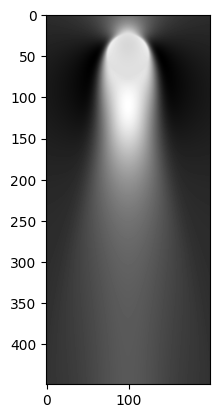

In [20]:
plt.imshow(Uh_X[:, 0].reshape((449,199)), cmap='gray')

## Energy Y_vel

In [21]:
cum_energy_Y = np.cumsum(np.square(Sh_Y))

In [22]:
percentage_of_energy_Y = cum_energy_Y/cum_energy_Y[-1]

1. r = 3 - captures 95.8%
2. r = 6 - captures 99.18%
3. r = 10 - captures 99.98%

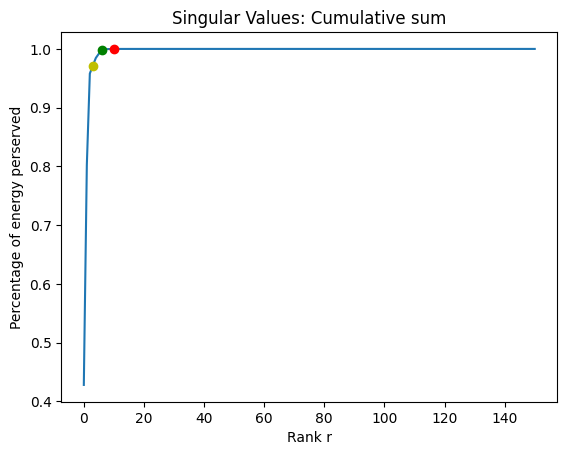

In [23]:
plt.figure(2)
plt.plot(percentage_of_energy_Y)
plt.title('Singular Values: Cumulative sum')
plt.plot(3,percentage_of_energy_Y[3],"yo")
plt.plot(6,percentage_of_energy_Y[6],"go")
plt.plot(10,percentage_of_energy_Y[10],"ro")
plt.xlabel('Rank r')
plt.ylabel('Percentage of energy perserved')
plt.show()

In [24]:
Sh_Y_diag = np.diag(Sh_Y)

In [26]:
for r in(3,6,10):
    Yapprox = Uh_Y[:,:r]@Sh_Y_diag[0:r,:r]@VT_Y[:r,:]
    error = Y_vel - Yapprox
    fnorm_error = np.sum(np.sum(np.square(error), axis=1), axis=0) 
    print(f' sq forb norn error: {fnorm_error} for r: {r}')
    
#     create_and_save_animation(Yapprox, f'truncated_vel_along_y_for_r_value_{r}', 150)

 sq forb norn error: 38357.522841871236 for r: 3
 sq forb norn error: 7427.013698436245 for r: 6
 sq forb norn error: 134.4997370084095 for r: 10


## Truncated SVD for a fixed r

## Y

In [27]:
r = 10

In [28]:
Uh_Y_trunc = Uh_Y[:,:r]

In [29]:
Sh_Y_diag_trunc = Sh_Y_diag[0:r,:r]

In [30]:
VT_Y_trunc = VT_Y[:r,:]

In [31]:
W_Y = Sh_Y_diag_trunc @ VT_Y_trunc

In [32]:
k = 89

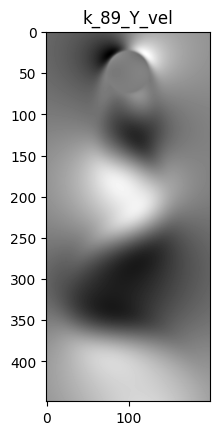

In [33]:
plt.imshow(Y_vel[:, k-1].reshape((449,199)), cmap='gray')
plt.title('k_89_Y_vel')
plt.savefig('Plots/k_89_Y_vel.png')

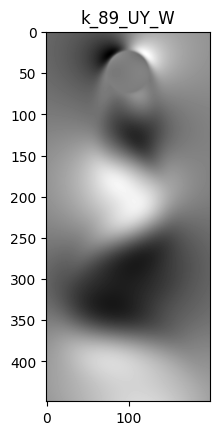

In [34]:
plt.imshow((Uh_Y_trunc @ W_Y[:, k-1]).reshape((449,199)), cmap='gray')
plt.title('k_89_UY_W')
plt.savefig('Plots/k_89_UY_W.png')

## X

In [35]:
r = 10 

In [36]:
Uh_X_trunc = Uh_X[:,:r]

In [37]:
Sh_X_diag_trunc = Sh_X_diag[0:r,:r]

In [38]:
VT_X_trunc = VT_X[:r,:]

In [39]:
W_X = Sh_X_diag_trunc @ VT_X_trunc

In [40]:
k = 89

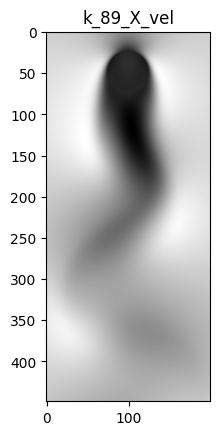

In [41]:
plt.imshow(X_vel[:, k-1].reshape((449,199)), cmap='gray')
plt.title('k_89_X_vel')
plt.savefig('Plots/k_89_X_vel.png')

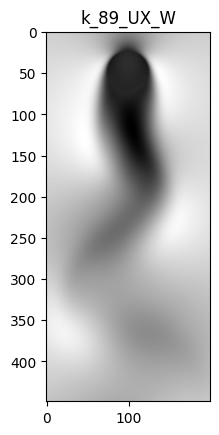

In [42]:
plt.imshow((Uh_X_trunc @ W_X[:, k-1]).reshape((449,199)), cmap='gray')
plt.title('k_89_UX_W')
plt.savefig('Plots/k_89_UX_W.png')

# Linear regression 

## Y

In [43]:
m = 41 

In [44]:
W_y = W_Y[:, :m-1] 

In [45]:
W_dash_y = W_Y[:, 1:m]

In [46]:
Uh_W_y, Sh_W_y, VT_W_y = np.linalg.svd(W_y, full_matrices=False)

In [47]:
pseudo_inverse_y = VT_W_y.T @ np.diag(1/Sh_W_y) @ Uh_W_y.T

In [48]:
A_y = W_dash_y @ pseudo_inverse_y

In [49]:
eigen_val_A_y, _ = np.linalg.eig(A_y)

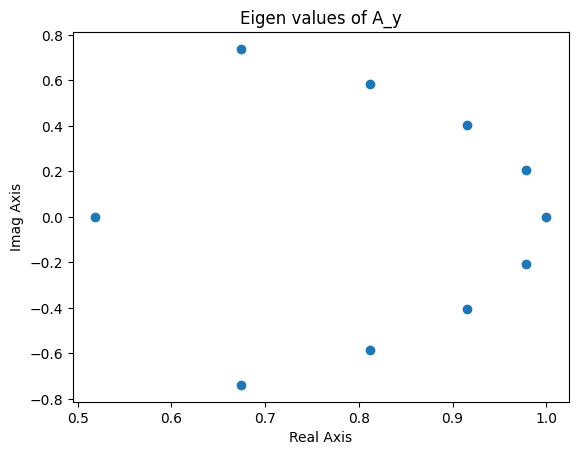

In [50]:
reals_y, ims_y = [], []

for value in eigen_val_A_y:
    reals_y.append(value.real)
    ims_y.append(value.imag)
        
plt.scatter(reals_y, ims_y)
plt.title('Eigen values of A_y')
plt.xlabel('Real Axis')
plt.ylabel('Imag Axis')
plt.savefig('Plots/Eigen values of A_y.png')

In [51]:
from numpy.linalg import matrix_power

In [52]:
y_pred_regression = np.zeros((89351, 0))

for k in range(1, 152):
    w_k_y = matrix_power(A_y, k-1) @ W_Y[:, 0]
    new_column = (Uh_Y_trunc @ w_k_y).reshape(-1, 1)
    y_pred_regression = np.hstack((y_pred_regression, new_column))

In [54]:
# create_and_save_animation(y_pred_regression, 'y_vel_using_regression', 150)

## X

In [55]:
m = 33

In [56]:
W_x = W_X[:, :m-1] 

In [57]:
W_dash_x = W_X[:, 1:m]

In [58]:
Uh_W_x, Sh_W_x, VT_W_x = np.linalg.svd(W_x, full_matrices=False)

In [59]:
pseudo_inverse_x = VT_W_x.T @ np.diag(1/Sh_W_x) @ Uh_W_x.T

In [60]:
A_x = W_dash_x @ pseudo_inverse_x

In [61]:
eigen_val_A_x, _ = np.linalg.eig(A_x)

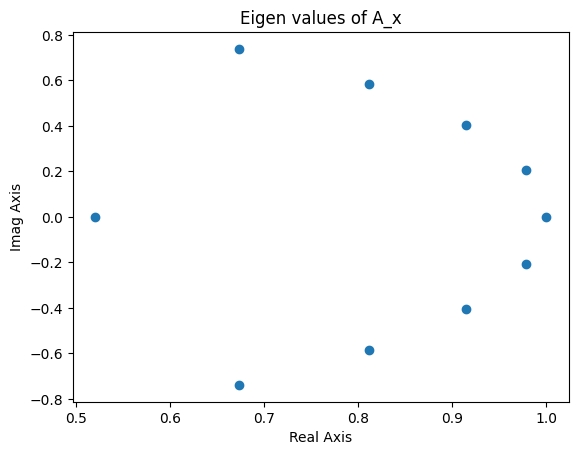

In [62]:
reals_x, ims_x = [], []

for value in eigen_val_A_x:
    reals_x.append(value.real)
    ims_x.append(value.imag)
    
plt.scatter(reals_x, ims_x)
plt.title('Eigen values of A_x')
plt.xlabel('Real Axis')
plt.ylabel('Imag Axis')
plt.savefig('Plots/Eigen values of A_x.png')

In [63]:
x_pred_regression = np.zeros((89351, 0))

for k in range(1, 152):
    w_k_x = matrix_power(A_x, k-1) @ W_X[:, 0]
    new_column = (Uh_X_trunc @ w_k_x).reshape(-1, 1)
    x_pred_regression = np.hstack((x_pred_regression, new_column))

In [64]:
# create_and_save_animation(x_pred_regression, 'x_vel_using_regression', 150)

# Bonus

As m increases, we start to include more singular values, some of which might correspond to noise rather than meaningful data. 
This can cause the model to overfit to the noise.

So we choose m in such a way that it only includes the meaningful modes ie ~33 for X and ~41 for Y